# Problem Set 2

## Question 4

(BH 26.12) Use the cps09mar dataset and the subset of men. Estimate a multinomial logit model for
marriage status similar to Figure 26.1 as a function of age. How do your findings compare with those for
women?

In [1]:
import os
import sys
import numpy as np
import pandas as pd

url = 'https://www.ssc.wisc.edu/~bhansen/econometrics/cps09mar.dta'
cps09mar = pd.read_stata(url)
cps09mar['married'] = (cps09mar['marital']<=4)*1
cps09mar['divorced'] = (cps09mar['marital']==5)*1
cps09mar['separated'] = (cps09mar['marital']==6)*1
cps09mar['never'] = (cps09mar['marital']==7)*1

Our $P_j$ can be specified as follow. For each $j \in \{ \text{married, divorced, separated, never} \}$,

$$
P_j = \frac{\exp(\alpha_j + \beta_j age_i)}{\sum_l \exp(\alpha_l + \beta_l age_i)}.
$$

It is desirable to normalize the above expression with $P_{\text{never}}$ (for computation). Otherwise, the objective function has infinitely many solutions and true $\beta_0$ is not identifiable, either.

$$
P_j = \frac{\exp(\alpha_j - \alpha_{\text{never}}+ (\beta_j- \beta_{\text{never}}) age_i)}{\sum_{l} \exp(\alpha_l - \alpha_{\text{never}} + (\beta_l-\beta_{\text{never}}) age_i)}
= \begin{cases} \frac{1}{1 + \sum_{l\neq \text{never}} \exp(\tilde{\alpha}_l + \tilde{\beta}_l age_i)} \\
\frac{\exp(\tilde{\alpha}_j + \tilde{\beta}_j age_i)}{1 + \sum_{l\neq \text{never}} \exp(\tilde{\alpha}_l + \tilde{\beta}_l age_i)}.
\end{cases}
$$

In [2]:
def log_f(beta,data):
    P1 = np.exp(beta[0] + beta[1]*data.age)
    P2 = np.exp(beta[2] + beta[3]*data.age)
    P3 = np.exp(beta[4] + beta[5]*data.age)
    P4 = 1
    denom = P1+P2+P3+P4
    l_i = (data.married*np.log(P1) + data.divorced*np.log(P2)
           + data.separated*np.log(P3) + data.never*np.log(P4)) - np.log(denom)
    return -np.sum(l_i)

<AxesSubplot: xlabel='age'>

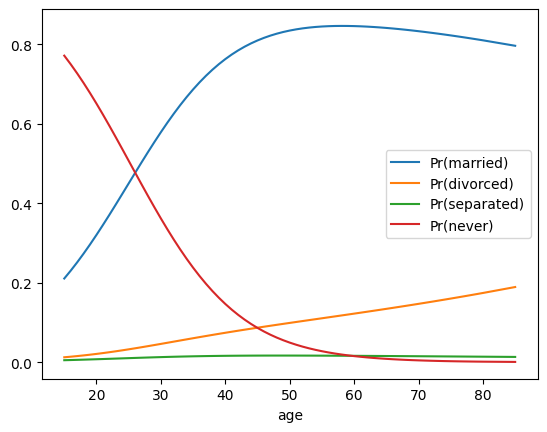

In [3]:
from scipy.optimize import minimize
# subset
df = cps09mar.loc[cps09mar.female==0].copy()

# optimization
def l(beta):
    return log_f(beta, data=df)
opt = minimize(l,[0]*6, method='BFGS')
beta_hat = opt.x

# generate results
df['exp1'] = np.exp(beta_hat[0]+beta_hat[1]*df['age'])
df['exp2'] = np.exp(beta_hat[2]+beta_hat[3]*df['age'])
df['exp3'] = np.exp(beta_hat[4]+beta_hat[5]*df['age'])
df['exp4'] = 1
df['denom'] = df['exp1'] + df['exp2'] + df['exp3'] + df['exp4']
df['Pr(married)'] = df['exp1'] / df['denom']
df['Pr(divorced)'] = df['exp2'] / df['denom']
df['Pr(separated)'] = df['exp3'] / df['denom']
df['Pr(never)'] = df['exp4'] / df['denom']

# plot
df_unique = df[df.age.duplicated()==False].sort_values('age')
df_unique.plot('age',['Pr(married)','Pr(divorced)','Pr(separated)','Pr(never)'])

<AxesSubplot: xlabel='age'>

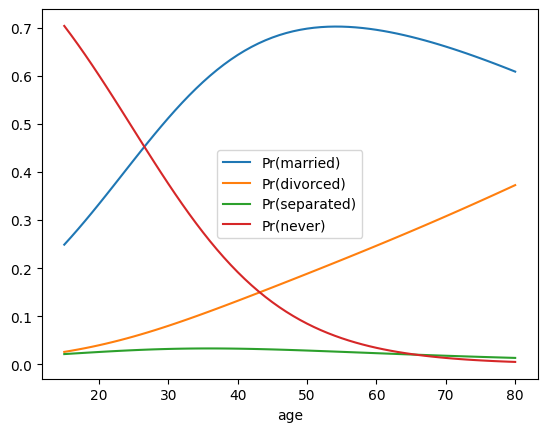

In [4]:
# subset
df = cps09mar.loc[cps09mar.female==1].copy()

# optimization
def l(beta):
    return log_f(beta, data=df)
opt = minimize(l, [0]*6, method = 'BFGS')
beta_hat = opt.x

# generate results
df['exp1'] = np.exp(beta_hat[0]+beta_hat[1]*df['age'])
df['exp2'] = np.exp(beta_hat[2]+beta_hat[3]*df['age'])
df['exp3'] = np.exp(beta_hat[4]+beta_hat[5]*df['age'])
df['exp4'] = 1
df['denom'] = df['exp1'] + df['exp2'] + df['exp3'] + df['exp4']
df['Pr(married)'] = df['exp1'] / df['denom']
df['Pr(divorced)'] = df['exp2'] / df['denom']
df['Pr(separated)'] = df['exp3'] / df['denom']
df['Pr(never)'] = df['exp4'] / df['denom']

# plot
df_unique = df[df.age.duplicated()==False].sort_values('age')
df_unique.plot('age',['Pr(married)','Pr(divorced)','Pr(separated)','Pr(never)'])